# Aprendizaje de Maquina

En este trabajo vamos a realizar el analisis de una Base de datos descargada de la pagina datos.gov.co la cual consta de informacion referente a portales territoriales en  la que analizaremos la dispersion ed los datos.

importamos las librerias:

In [1]:
import numpy as np 
import pandas as pd

In [2]:
from pytz import common_timezones, all_timezones
import dateutil

Leemos la base de datos y la guardamos en la variable datos

In [3]:
informacion = pd.read_csv("Infectados.csv")

Verificando si hay valores nulos, para eliminar columanas no necesarias

In [4]:
informacion.head()

,Orden,control,fecha_examen,fecha_recepcion,muestra,nombre_prueba,microorganismo,fecha_expedicion,semana,año,...,grupo_migrantes,grupo_carcelario,grupo_gestante,grupo_indigente,grupo_poblacion_icbf,grupo_madres_comunitarias,grupo_desmovizados,grupo_psiquiatrico,grupo_victima_violencia,grupo_otros
0,1,LABORATORIOS,2016-01-22T00:00:00.000,- -,Sangre Total,Hemocultivo,Enterobacter aerogenes,- -,- -,2016,...,No,No,No,No,No,No,No,No,No,No
1,2,LABORATORIOS,2016-01-23T00:00:00.000,- -,Orina,Urocultivo,Klebsiella pneumoniae,- -,- -,2016,...,No,No,No,No,No,No,No,No,No,No
2,3,LABORATORIOS,2016-02-19T00:00:00.000,- -,Orina,Urocultivo,Pseudomonas aeruginosa,- -,- -,2016,...,No,No,No,No,No,No,No,No,No,No
3,4,LABORATORIOS,2016-03-27T00:00:00.000,- -,Sangre Total,Hemocultivo,Enterobacter cloacae,- -,- -,2016,...,No,No,No,No,No,No,No,No,No,No
4,5,LABORATORIOS,2016-04-26T00:00:00.000,- -,Sangre Total,Hemocultivo,Klebsiella pneumoniae,- -,- -,2016,...,No,No,No,No,No,No,No,No,No,No


In [115]:
datos.dtypes

Orden                         int64
control                      object
fecha_examen                 object
fecha_recepcion              object
muestra                      object
nombre_prueba                object
microorganismo               object
fecha_expedicion             object
semana                       object
año                           int64
edad                         object
grupo_etario                 object
curso_de vida                object
sexo                         object
barrio_vereda                object
tipo_seguridad_social        object
estrato                      object
tipo_caso                    object
condicion_final              object
tipo_uci                     object
departamento_procedencia     object
municipio_procedencia        object
departamento_residencia      object
municipio_residencia         object
grupo_discapacidad           object
grupo_desplazados            object
grupo_migrantes              object
grupo_carcelario            

Eliminando columnas

In [5]:
informacion = informacion.drop(columns=["Orden","control","fecha_examen","fecha_recepcion","muestra","nombre_prueba","microorganismo","fecha_expedicion","semana","año","edad","grupo_etario","curso_de vida","sexo","barrio_vereda","tipo_seguridad_social","estrato","tipo_caso","condicion_final","tipo_uci","departamento_procedencia","departamento_residencia","municipio_residencia","municipio_procedencia"])

Mostrando a ver si hay datos nulos

In [7]:
informacion.isna().sum()

grupo_discapacidad           0
grupo_desplazados            0
grupo_migrantes              0
grupo_carcelario             0
grupo_gestante               0
grupo_indigente              0
grupo_poblacion_icbf         0
grupo_madres_comunitarias    0
grupo_desmovizados           0
grupo_psiquiatrico           0
grupo_victima_violencia      0
grupo_otros                  0
dtype: int64

In [8]:
informacion.dtypes

grupo_discapacidad           object
grupo_desplazados            object
grupo_migrantes              object
grupo_carcelario             object
grupo_gestante               object
grupo_indigente              object
grupo_poblacion_icbf         object
grupo_madres_comunitarias    object
grupo_desmovizados           object
grupo_psiquiatrico           object
grupo_victima_violencia      object
grupo_otros                  object
dtype: object

Convirtiendo de datos ategoricos a numericos

In [9]:
informacion=pd.get_dummies(informacion, columns=["grupo_discapacidad","grupo_desplazados","grupo_migrantes","grupo_carcelario","grupo_gestante","grupo_indigente","grupo_poblacion_icbf","grupo_madres_comunitarias","grupo_desmovizados","grupo_psiquiatrico","grupo_victima_violencia","grupo_otros"], drop_first=True)

In [10]:
informacion.dtypes

grupo_discapacidad_Si           uint8
grupo_migrantes_Si              uint8
grupo_carcelario_Si             uint8
grupo_gestante_Si               uint8
grupo_madres_comunitarias_No    uint8
grupo_madres_comunitarias_Si    uint8
grupo_desmovizados_Si           uint8
grupo_psiquiatrico_Si           uint8
grupo_otros_Si                  uint8
dtype: object

Mostrando datos con la libreria matplotlib

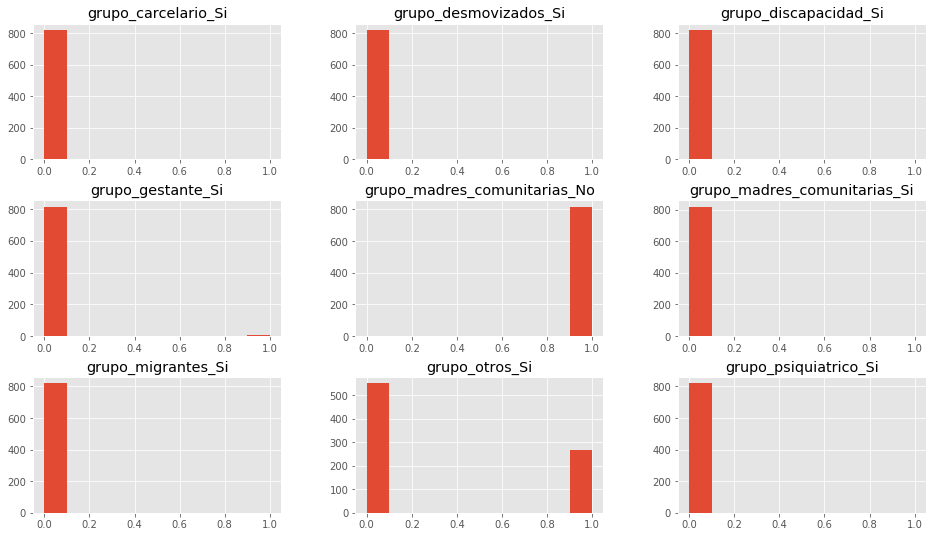

In [13]:
import matplotlib.pyplot as plt
informacion.hist()
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.show()

Aplicando el algoritmo de agrupamiento

In [14]:
informacion_data = np.array(informacion)
informacion_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
KMeans = KMeans(n_clusters=10).fit(informacion_data)
centros = KMeans.cluster_centers_
centros.size


90

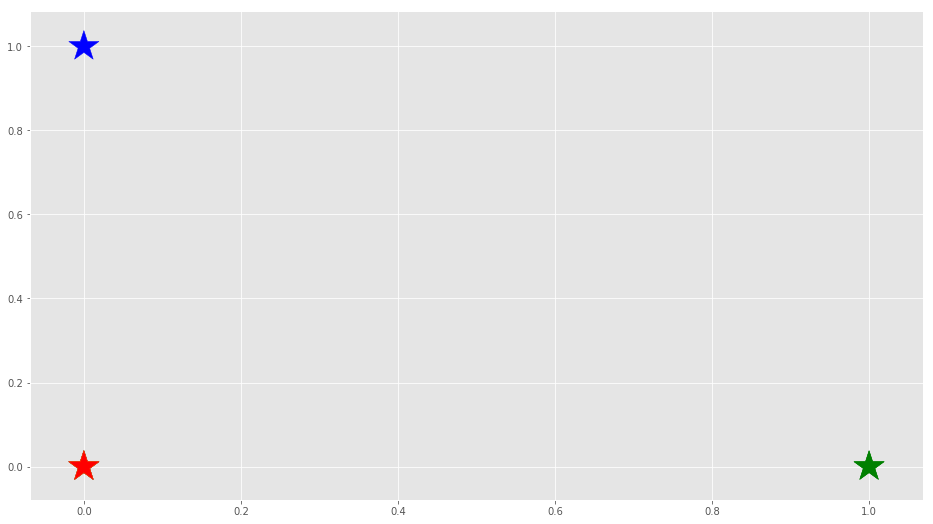

In [29]:
colores=['red','green','blue','yellow']

plt.scatter(centros[:, 0], centros[:, 5], marker='*', c=colores, s=1000)



In [ ]:
Esta grafica nos da a entender que en los datos laestan bastante dispersos,